## Лабораторная работа №1

In [1]:
import numpy as np
from numpy.fft import fft, fftshift, fftfreq
import matplotlib.pyplot as plt

In [582]:
f0 = 5 * 12
fd = 10 * f0
dt = 1 / fd
nfft = 8192
Fmax = 1/dt
h = 1

## Телеграфный сигнал

In [583]:
def get_telegraph_signal(h = 1, seed = 12):
    data = np.random.default_rng(seed).random(1000)
    symOne = 1 * (data >= 0.5)
    symZero = -1 * (data < 0.5)
    return (h * (symOne + symZero), range(len(data)))

[-1  1 -1 -1 -1 -1  1 -1  1  1]


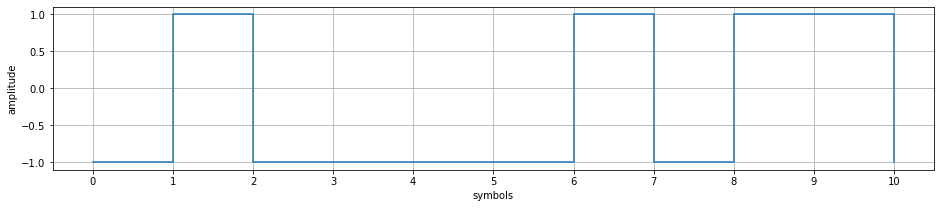

In [584]:
val, numbers = get_telegraph_signal()
fig1, ax1 = plt.subplots(figsize = (15.8, 3))
ax1.step(numbers[:11], val[:11], where = 'post')
print(val[:10])
ax1.set_xlabel('symbols')
ax1.set_ylabel('amplitude')
ax1.set_xticks(np.arange(0, 11, 1));
ax1.grid()

In [585]:
def to_samples(x, f0, nperiods = 10):
    T = nperiods / f0
    ns = int(fd * T)
    print("Число отсчётов, приходящихся на один символ: ", ns)
    xs = np.array([np.ones(ns)*i for i in x])
    xs = np.reshape(xs, -1)
    t = np.arange(0, dt * len(xs), dt)
    #xs = xs * np.sin(2 * np.pi * f0 * t)
    return (xs, t, T)

Число отсчётов, приходящихся на один символ:  100


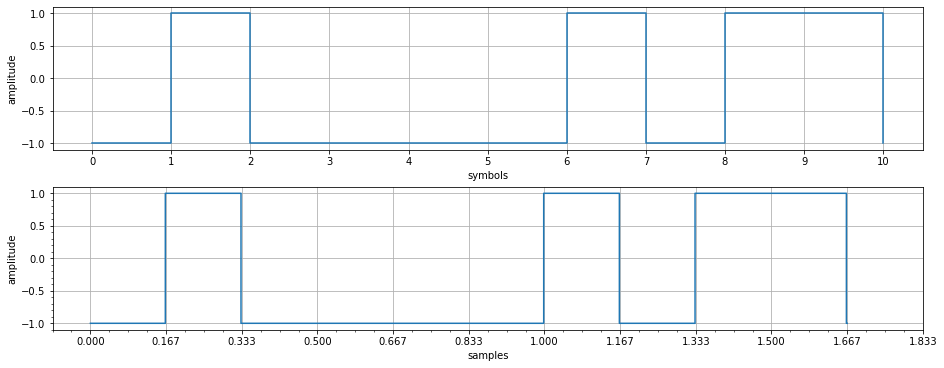

In [586]:
(s, t, T) = to_samples(val, f0)
#(s2, t2, T2) = to_samples(val, f0, nperiods = 20)

fig2, ax2 = plt.subplots(2, 1, figsize = (13, 5), constrained_layout=True)

ax2[0].step(numbers[:11], val[:11], where = 'post')
ax2[0].set_xlabel('symbols')
ax2[0].set_ylabel('amplitude')
ax2[0].set_xticks(np.arange(0, 11, 1));
ax2[0].grid()

ax2[1].step(t[:1001], s[:1001])
ax2[1].set_xlabel('samples')
ax2[1].set_ylabel('amplitude');
ax2[1].set_xticks(np.arange(0, 1.9, 10 / f0));
ax2[1].grid()
ax2[1].minorticks_on()

#fig2.tight_layout()


## Теория

In [587]:
def R_telegraph(tau, T, h = 1):
    tselect = 1 * (np.abs(tau) <= T)
    data = h**2 * (1 - abs(tau)/T)
    return tselect * data

def G_telegraph(f, T, h = 1):             # уберём множитель 2 с целью сравнения не односторонних СП
    return h**2 * T * (np.sinc(f * T))**2 # np.pi 

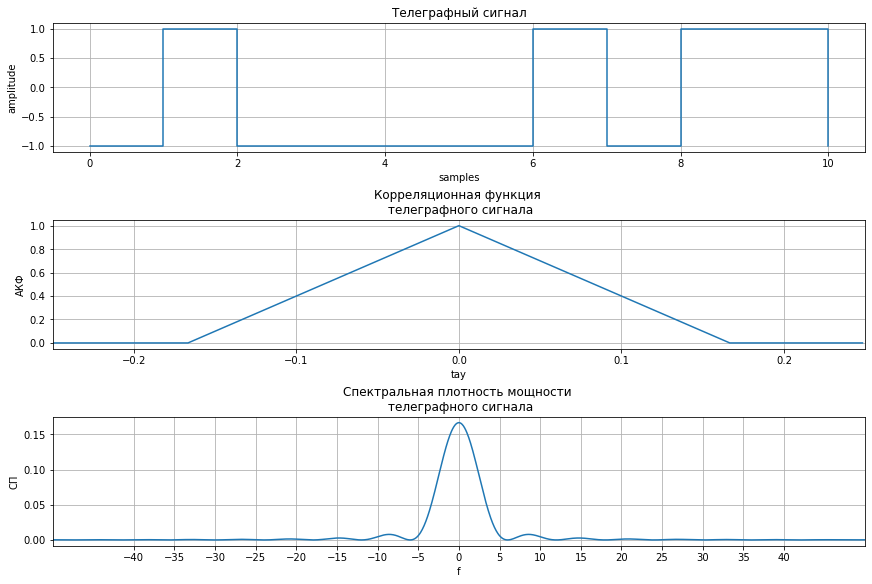

In [588]:
tteor = np.arange(-1.5 * T, 1.5 * T, step = dt)

fteor = np.linspace(-0.5*Fmax, 0.5*Fmax, nfft)

fig3, ax3 = plt.subplots(3, 1, figsize = (12, 8), constrained_layout=True)

ax3[0].step(numbers[:11], val[:11], where = 'post')
ax3[0].set_xlabel('samples')
ax3[0].set_ylabel('amplitude')
ax3[0].set_title('Телеграфный сигнал')
ax3[0].grid()

ax3[1].plot(tteor, R_telegraph(tteor, T))
ax3[1].set_xlim(-1.5*T, 1.5*T)
ax3[1].set_xlabel('tay')
ax3[1].set_ylabel('АКФ')
ax3[1].set_title('Корреляционная функция \n телеграфного сигнала')
ax3[1].grid()

ax3[2].plot(fteor, G_telegraph(fteor, T))
ax3[2].set_xlim(-0.5*Fmax/6, 0.5*Fmax/6)
ax3[2].set_xticks(np.arange(-40, 45, 5));
ax3[2].set_xlabel('f')
ax3[2].set_ylabel('СП')
ax3[2].set_title('Спектральная плотность мощности \n телеграфного сигнала')
ax3[2].grid()


## Сравнение эксперимента и теории

In [589]:
Rexp_telegraph = 1/len(s) * np.correlate(s, s, mode = 'full')
texp = np.arange(-dt*(len(s)-1), dt * len(s), dt)

In [592]:
Gexp_telegraph = fft(Rexp_telegraph, norm = 'forward')
Gexp_telegraph = 0.5 * (T/dt) * Gexp_telegraph 
fexp = np.linspace(-0.5*Fmax , 0.5*Fmax, len(Rexp_telegraph)) # /np.pi
Gexp_telegraph = np.abs(fftshift(Gexp_telegraph)) #fftshift(Gexp_telegraph)

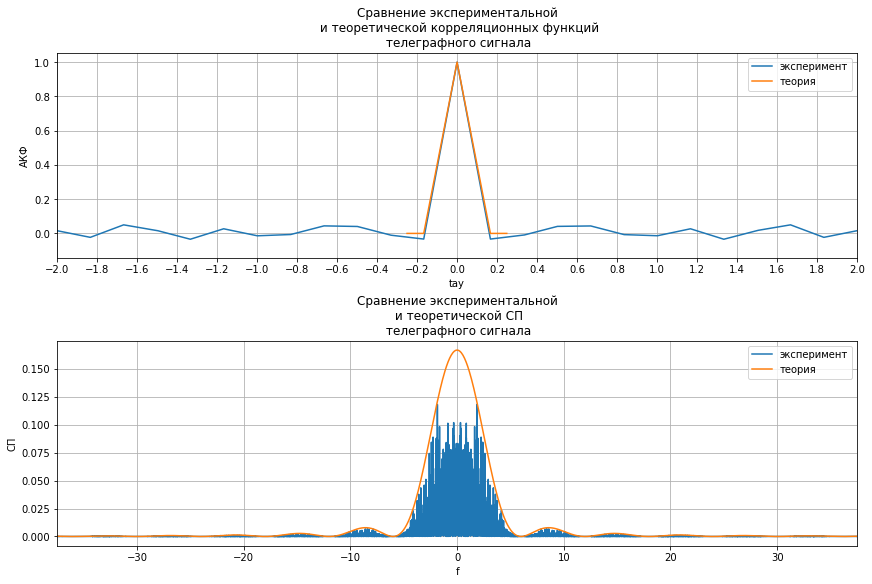

In [593]:
fig4, ax4 = plt.subplots(2, 1, figsize = (12, 8), constrained_layout=True)

ax4[0].plot(texp, Rexp_telegraph, label = 'эксперимент')
ax4[0].plot(tteor, R_telegraph(tteor, T), label = 'теория')
ax4[0].set_xlabel('tay')
ax4[0].set_ylabel('АКФ')
ax4[0].set_title('Сравнение экспериментальной\n и теоретической корреляционных функций\n телеграфного сигнала')
ax4[0].set_xlim(-10*T, 10*T)
ax4[0].set_xticks(np.arange(-2, 2.2, 0.2));
ax4[0].legend();
ax4[0].grid()

ax4[1].plot(fexp, Gexp_telegraph, label = 'эксперимент')
ax4[1].plot(fteor, G_telegraph(fteor, T), label = 'теория')
ax4[1].set_xlabel('f')
ax4[1].set_ylabel('СП')
ax4[1].set_title('Сравнение экспериментальной\n и теоретической СП\n телеграфного сигнала')
ax4[1].set_xlim(-0.5*Fmax/8, 0.5*Fmax/8)
ax4[1].legend()
ax4[1].grid()

## ФМ-2

In [594]:
def to_fm2(x, t, h, f0, U0 = 1.0):
    ph0 = 0
    return U0 / h * x * np.sin(2 * np.pi * f0 * t + ph0)

[-1  1 -1 -1 -1 -1  1 -1  1  1]


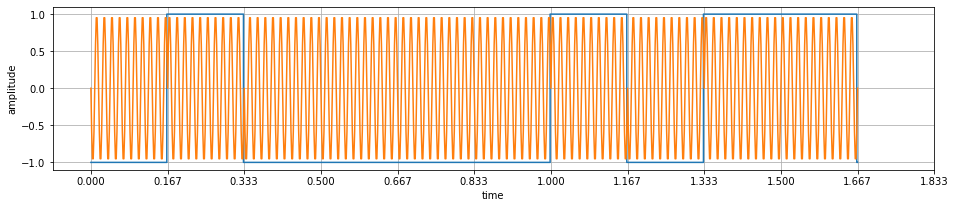

In [595]:
s_fm2 = to_fm2(s, t, h, f0)

fig5, ax5 = plt.subplots(figsize = (15.8, 3))
ax5.step(t[:1001], s[:1001])
ax5.plot(t[:1001], s_fm2[:1001])
print(val[:10])
ax5.set_xlabel('time')
ax5.set_ylabel('amplitude')
ax5.set_xticks(np.arange(0, 1.9, 10 / f0));
ax5.grid()

In [596]:
def R_fm2(tau, T, f0, U0 = 1):
    tselect = 1 * (np.abs(tau) <= T)
    data = U0**2 / 2 * (1-abs(tau)/T) * np.cos(2 * np.pi * f0 * tau)
    return tselect * data

def G_fm2(f, T, f0, U0 = 1.0):
    return U0**2 / 2 * T * (np.sinc((f - f0) * T))**2

In [597]:
tteor_fm2 = np.arange(-1.5*T, 1.5*T, step = dt)
nfft_fm2 = 1024
fteor_fm2 = np.linspace(-0.5*Fmax, 0.5*Fmax, nfft)

In [598]:
Rexp_fm2 = 1/len(s_fm2) * np.correlate(s_fm2, s_fm2, mode = 'full')
texp_fm2 = np.arange(-dt*(len(s_fm2)-1), dt * len(s_fm2), dt)

In [599]:
Gexp_fm2 = fft(Rexp_fm2, norm = 'forward')
Gexp_fm2 = 0.5 * (T/dt) * Gexp_fm2 
fexp_fm2 = np.linspace(-0.5*Fmax , 0.5*Fmax, len(Rexp_fm2)) # /np.pi
Gexp_fm2 = np.abs(fftshift(Gexp_fm2)) 

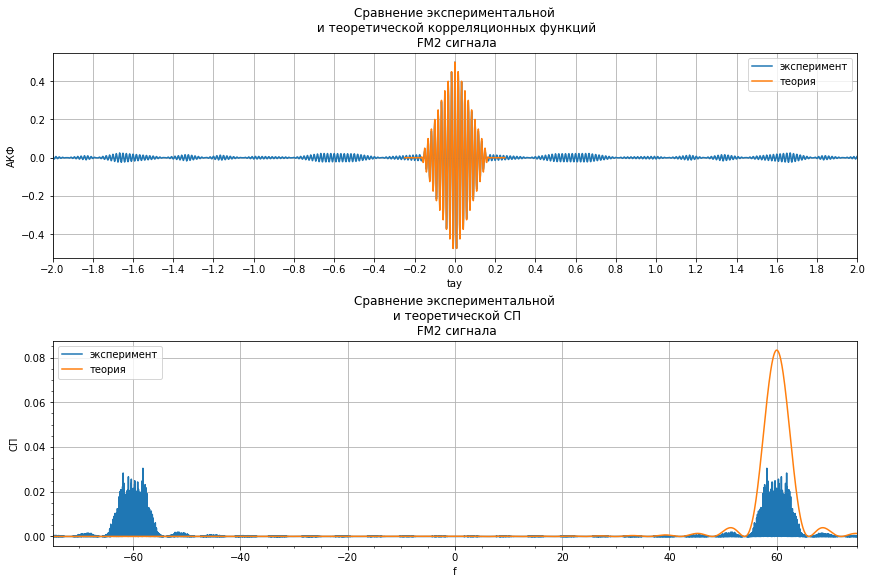

In [600]:
fig6, ax6 = plt.subplots(2, 1, figsize = (12, 8), constrained_layout=True)

ax6[0].plot(texp_fm2, Rexp_fm2, label = 'эксперимент')
ax6[0].plot(tteor_fm2, R_fm2(tteor_fm2, T, f0), label = 'теория')
ax6[0].set_xlabel('tay')
ax6[0].set_ylabel('АКФ')
ax6[0].set_title('Сравнение экспериментальной\n и теоретической корреляционных функций\n FM2 сигнала')
ax6[0].set_xlim(-10*T, 10*T)
ax6[0].set_xticks(np.arange(-2, 2.2, 0.2));
ax6[0].legend()
ax6[0].grid()

ax6[1].plot(fexp_fm2, Gexp_fm2, label = 'эксперимент')
ax6[1].plot(fteor_fm2, G_fm2(fteor_fm2, T, f0), label = 'теория')
ax6[1].set_xlabel('f')
ax6[1].set_ylabel('СП')
ax6[1].set_title('Сравнение экспериментальной\n и теоретической СП\n FM2 сигнала')
ax6[1].set_xlim(-0.5*Fmax/4, 0.5*Fmax/4)
ax6[1].legend()
ax6[1].minorticks_on()
ax6[1].grid()

## ФМ-4 

In [601]:
def to_fm4(val, t, h, f0, U0 = 1.0, nperiods = 10):
    nperiods_new = nperiods * 2
    ph0 = 0
    ch = [int(val[i]) for i in range(len(val)) if i % 2 != 0]
    nch = [int(val[i]) for i in range(len(val)) if i % 2 == 0]
    (ch_samples, t0, T_fm4) = to_samples(ch, f0, nperiods = nperiods_new)
    (nch_samples, t0, T_fm4)  = to_samples(nch, f0, nperiods = nperiods_new)
    return U0 / (np.sqrt(2) * h) * (ch_samples * np.sin(2 * np.pi * f0 * t + ph0) + nch_samples * np.cos(2 * np.pi * f0 * t + ph0))

Число отсчётов, приходящихся на один символ:  200
Число отсчётов, приходящихся на один символ:  200
[-1  1 -1 -1 -1 -1  1 -1  1  1]


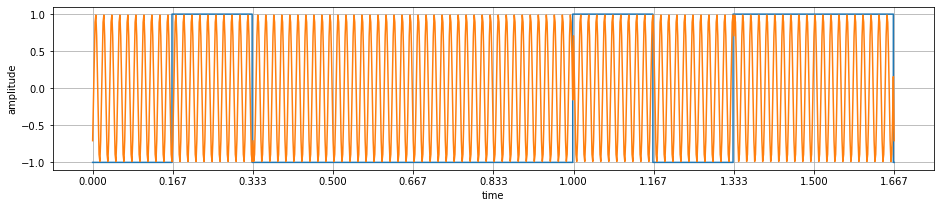

In [604]:
s_fm4 = to_fm4(val, t, h, f0)

fig7, ax7 = plt.subplots(figsize = (15.8, 3))
ax7.step(t[:1001], s[:1001])
ax7.plot(t[:1001], s_fm4[:1001])
print(val[:10])
ax7.set_xlabel('time')
ax7.set_ylabel('amplitude')
ax7.set_xticks(np.arange(0, 1.8, 10 / f0));
#ax7.set_xlim(1.0, 1.4)
ax7.grid()

In [605]:
def G_fm4(f, T, f0, U0 = 1):
    return U0**2 * T * (np.sinc(2 * (f - f0) * T))**2

In [606]:
nfft_fm4 = 1024
fteor_fm4 = np.linspace(-0.5*Fmax, 0.5*Fmax, nfft)

In [607]:
Rexp_fm4 = 1/len(s_fm4) * np.correlate(s_fm4, s_fm4, mode = 'full')
texp_fm4 = np.arange(-dt*(len(s_fm4)-1), dt * len(s_fm4), dt)

In [608]:
Gexp_fm4 = fft(Rexp_fm4, norm = 'forward')
Gexp_fm4 = 0.5 * (T/dt) * Gexp_fm4 
fexp_fm4 = np.linspace(-0.5*Fmax , 0.5*Fmax, len(Rexp_fm4)) # /np.pi
Gexp_fm4 = np.abs(fftshift(Gexp_fm4)) 

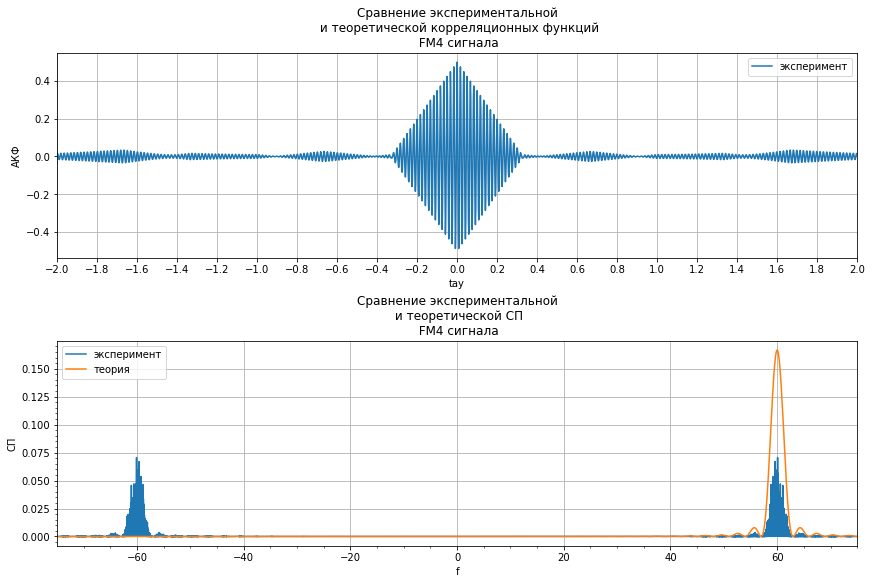

In [609]:
fig8, ax8 = plt.subplots(2, 1, figsize = (12, 8), constrained_layout=True)

ax8[0].plot(texp_fm4, Rexp_fm4, label = 'эксперимент')
ax8[0].set_xlabel('tay')
ax8[0].set_ylabel('АКФ')
ax8[0].set_title('Сравнение экспериментальной\n и теоретической корреляционных функций\n FM4 сигнала')
ax8[0].set_xlim(-10*T, 10*T)
ax8[0].set_xticks(np.arange(-2, 2.2, 0.2));
ax8[0].legend()
ax8[0].grid()

ax8[1].plot(fexp_fm4, Gexp_fm4, label = 'эксперимент')
ax8[1].plot(fteor_fm4, G_fm4(fteor_fm4, T, f0), label = 'теория')
ax8[1].set_xlabel('f')
ax8[1].set_ylabel('СП')
ax8[1].set_title('Сравнение экспериментальной\n и теоретической СП\n FM4 сигнала')
ax8[1].set_xlim(-0.5*Fmax/4, 0.5*Fmax/4)
ax8[1].legend()
ax8[1].minorticks_on()
ax8[1].grid()

## ФМ-4 со смещением 

In [618]:
def to_fm4_offset(val, t, h, f0, U0 = 1.0, nperiods = 10):
    nperiods_new = nperiods * 2
    ph0 = 0
    ch = [int(val[i]) for i in range(len(val)) if i % 2 != 0]
    nch = [int(val[i]) for i in range(len(val)) if i % 2 == 0] 
    (ch_samples, t_offset, T_fm4) = to_samples(ch, f0, nperiods = nperiods_new)
    (nch_samples, t_offset, T_fm4) = to_samples(nch, f0, nperiods = nperiods_new)
    ch_samples = np.array(list(np.zeros(int(T/dt))) + list(ch_samples))
    nch_samples = np.array(list(nch_samples) + list(np.zeros(int(T/dt))))
    
    time_plus = np.ones(int(T/dt))
    time_plus[0] = t_offset[-1] + dt
    time_plus = [time_plus[i-1] + dt for i in range(1, len(time_plus)+1)]
    t_offset = np.array(list(t_offset) + list(time_plus))
    
    res = U0 / (h * np.sqrt(2)) * (ch_samples * np.sin(2 * np.pi * f0 * t_offset + ph0) + nch_samples * np.cos(2 * np.pi * f0 * t_offset + ph0))
    return t_offset, ch_samples, nch_samples, res * np.abs(np.sin(2 * np.pi * (1/(2*T)) * t_offset))

Число отсчётов, приходящихся на один символ:  200
Число отсчётов, приходящихся на один символ:  200


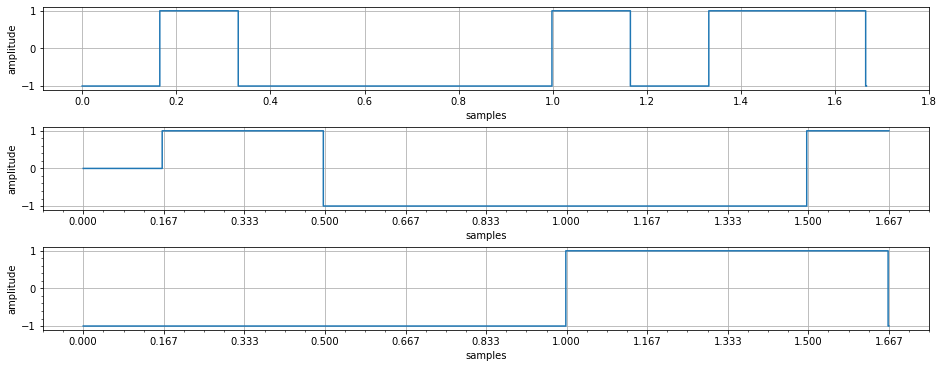

In [621]:
t_offset, ch_samples, nch_samples, s_fm4_offset = to_fm4_offset(val, t, h, f0)

fig9, ax9 = plt.subplots(3, 1, figsize = (13, 5), constrained_layout=True)

ax9[0].step(t[:1001], s[:1001])
ax9[0].set_xlabel('samples')
ax9[0].set_ylabel('amplitude')
ax9[0].set_xticks(np.arange(0, 2, 0.2));
ax9[0].grid()

ax9[1].step(t_offset[:1001], ch_samples[:1001])
ax9[1].set_xlabel('samples')
ax9[1].set_ylabel('amplitude');
ax9[1].set_xticks(np.arange(0, 1.8, 10 / f0));
ax9[1].grid()
ax9[1].minorticks_on()

ax9[2].step(t_offset[:1001], nch_samples[:1001])
ax9[2].set_xlabel('samples')
ax9[2].set_ylabel('amplitude');
ax9[2].set_xticks(np.arange(0, 1.8, 10 / f0));
ax9[2].grid()
ax9[2].minorticks_on()

[-1  1 -1 -1 -1 -1  1 -1  1  1]


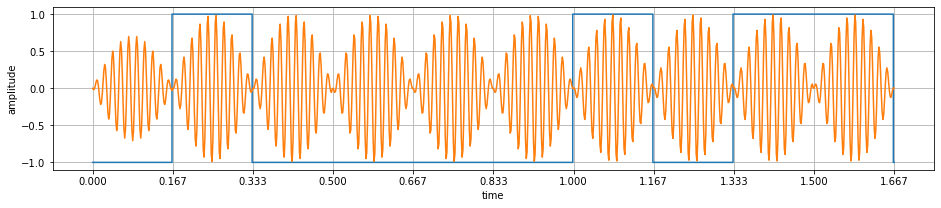

In [623]:
fig10, ax10 = plt.subplots(figsize = (15.8, 3))
ax10.step(t_offset[:1001], s[:1001])
ax10.plot(t_offset[:1001], s_fm4_offset[:1001])
print(val[:10])
ax10.set_xlabel('time')
ax10.set_ylabel('amplitude')
ax10.set_xticks(np.arange(0, 1.8, 10 / f0));
ax10.grid()

In [624]:
def G_fm4_offset(f, T, f0, U0 = 1):
    return  U0**2 * T * (np.sinc(2 * (f - f0) * T))**2

In [625]:
nfft_fm4_offset = 1024
fteor_fm4_offset = np.linspace(-0.5*Fmax, 0.5*Fmax, nfft)

In [626]:
Rexp_fm4_offset = 1/len(s_fm4_offset) * np.correlate(s_fm4_offset, s_fm4_offset, mode = 'full')
texp_fm4_offset = np.arange(-dt*(len(s_fm4_offset)-1), dt * len(s_fm4_offset), dt)

In [627]:
Gexp_fm4_offset = fft(Rexp_fm4_offset, norm = 'forward')
Gexp_fm4_offset = 0.5 * (T/dt) * Gexp_fm4_offset 
fexp_fm4_offset = np.linspace(-0.5*Fmax , 0.5*Fmax, len(Rexp_fm4_offset)) # /np.pi
Gexp_fm4_offset = np.abs(fftshift(Gexp_fm4_offset)) 

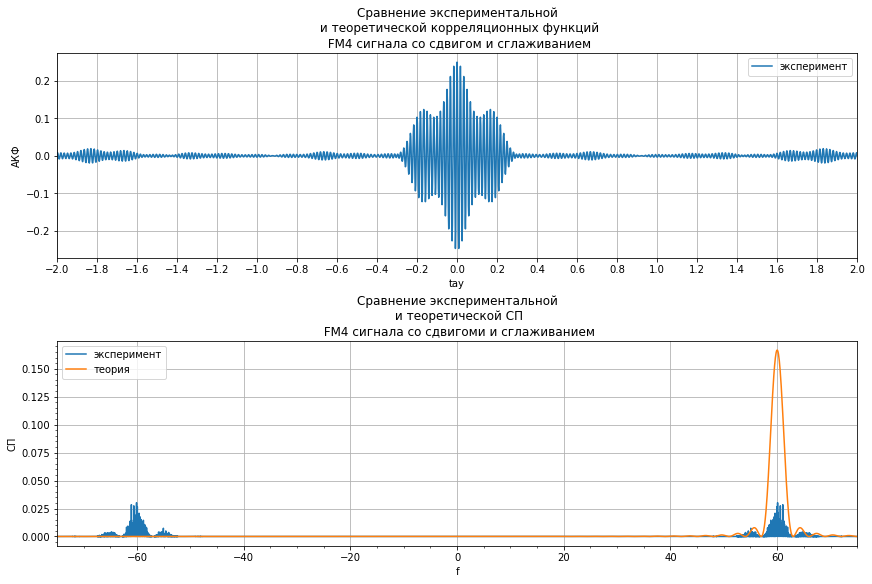

In [630]:
fig11, ax11 = plt.subplots(2, 1, figsize = (12, 8), constrained_layout=True)

ax11[0].plot(texp_fm4_offset, Rexp_fm4_offset, label = 'эксперимент')
ax11[0].set_xlabel('tay')
ax11[0].set_ylabel('АКФ')
ax11[0].set_title('Сравнение экспериментальной\n и теоретической корреляционных функций\n FM4 сигнала со сдвигом и сглаживанием')
ax11[0].set_xlim(-10*T, 10*T)
ax11[0].set_xticks(np.arange(-2, 2.2, 0.2));
ax11[0].legend()
ax11[0].grid()

ax11[1].plot(fexp_fm4_offset, Gexp_fm4_offset, label = 'эксперимент')
ax11[1].plot(fteor_fm4_offset, G_fm4_offset(fteor_fm4_offset, T, f0), label = 'теория')
ax11[1].set_xlabel('f')
ax11[1].set_ylabel('СП')
ax11[1].set_title('Сравнение экспериментальной\n и теоретической СП\n FM4 сигнала со сдвигоми и сглаживанием')
ax11[1].set_xlim(-0.5*Fmax/4, 0.5*Fmax/4)
ax11[1].legend()
ax11[1].minorticks_on()
ax11[1].grid()

## ФМ-4 со сглаживанием

In [34]:
def to_fm4_smoothing(val, t, h, f0, U0 = 1.0, nperiods = 10):
    nperiods_new = nperiods * 2
    ph0 = 0
    ch = [int(val[i]) for i in range(len(val)) if i % 2 != 0]
    nch = [int(val[i]) for i in range(len(val)) if i % 2 == 0]
    (ch_samples, t0, T_fm4) = to_samples(ch, f0, nperiods = nperiods_new)
    (nch_samples, t0, T_fm4)  = to_samples(nch, f0, nperiods = nperiods_new)
    first = U0 / h * (ch_samples * np.sin(2 * np.pi * f0 * t + ph0))
    second = U0 / h * (nch_samples * np.cos(2 * np.pi * f0 * t + ph0))
    return (first + second) * np.abs(np.sin(2 * np.pi * (1/(4*T)) * t))

Число отсчётов, приходящихся на один символ:  200
Число отсчётов, приходящихся на один символ:  200
[ 1 -1  1 -1  1 -1  1  1 -1  1]


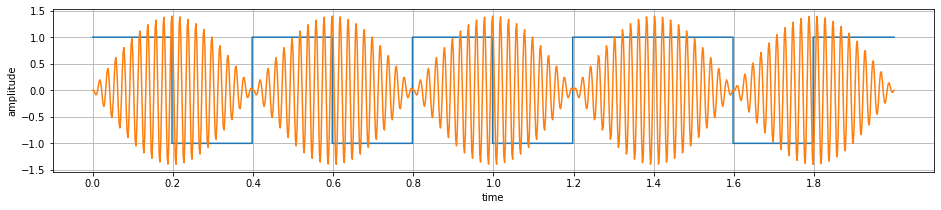

In [35]:
s_fm4_smoothing = to_fm4_smoothing(val, t, h, f0)

fig12, ax12 = plt.subplots(figsize = (15.8, 3))
ax12.step(t[:1001], s[:1001])
ax12.plot(t[:1001], s_fm4_smoothing[:1001])
print(val[:10])
ax12.set_xlabel('time')
ax12.set_ylabel('amplitude')
ax12.set_xticks(np.arange(0, 1.9, 10 / f0));
#ax12.set_xlim(1.1, 1.3)
ax12.grid()

In [36]:
nfft_fm4_smoothing = 1024
fteor_fm4_smoothing = np.linspace(-0.5*Fmax, 0.5*Fmax, nfft)

In [37]:
Rexp_fm4_smoothing = 1/len(s_fm4_smoothing) * np.correlate(s_fm4_smoothing, s_fm4_smoothing, mode = 'full')
texp_fm4_smoothing = np.arange(-dt*(len(s_fm4_smoothing)-1), dt * len(s_fm4_smoothing), dt)

In [472]:
Gexp_fm4_smoothing = fft(Rexp_fm4_smoothing, norm = 'forward')
Gexp_fm4_smoothing = 0.5 * (T/dt) * Gexp_fm4_smoothing 
fexp_fm4_smoothing = np.linspace(-0.5*Fmax , 0.5*Fmax, len(Rexp_fm4_smoothing)) # /np.pi
Gexp_fm4_smoothing = np.abs(fftshift(Gexp_fm4_smoothing)) 

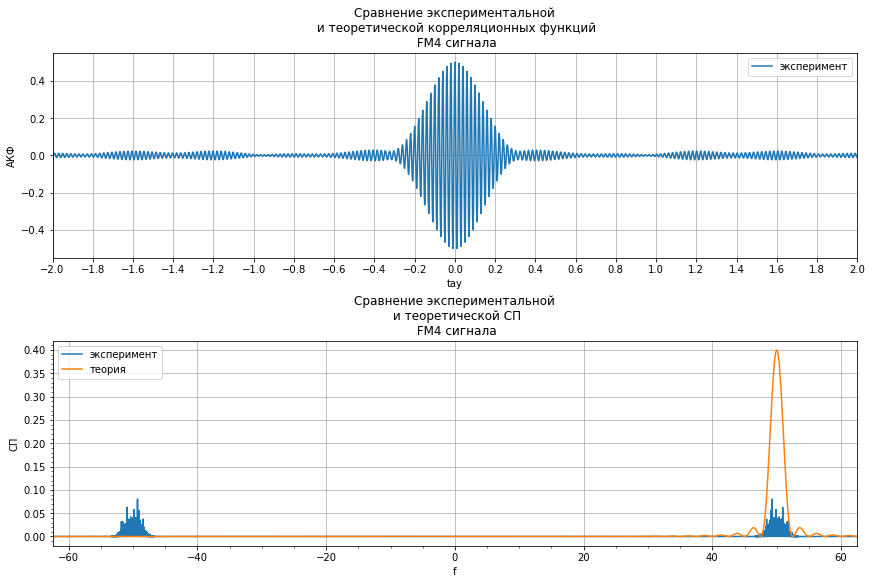

In [473]:
fig13, ax13 = plt.subplots(2, 1, figsize = (12, 8), constrained_layout=True)

ax13[0].plot(texp_fm4_smoothing, Rexp_fm4_smoothing, label = 'эксперимент')
ax13[0].set_xlabel('tay')
ax13[0].set_ylabel('АКФ')
ax13[0].set_title('Сравнение экспериментальной\n и теоретической корреляционных функций\n FM4 сигнала')
ax13[0].set_xlim(-10*T, 10*T)
ax13[0].set_xticks(np.arange(-2, 2.2, 0.2));
ax13[0].legend()
ax13[0].grid()

ax13[1].plot(fexp_fm4_smoothing, Gexp_fm4_smoothing, label = 'эксперимент')
ax13[1].plot(fteor_fm4, G_fm4(fteor_fm4, T, f0), label = 'теория')
ax13[1].set_xlabel('f')
ax13[1].set_ylabel('СП')
ax13[1].set_title('Сравнение экспериментальной\n и теоретической СП\n FM4 сигнала')
ax13[1].set_xlim(-0.5*Fmax/4, 0.5*Fmax/4)
ax13[1].legend()
ax13[1].minorticks_on()
ax13[1].grid()

# ФМ 16

In [61]:
def groupingBits(val):
    
    first = []
    second = []
    third = []
    fourth = []
    
    try:
        for i in range(0,len(val),4):
            first.append(val[i])
            second.append(val[i+1])
            third.append(val[i+2])
            fourth.append(val[i+3])
    except IndexError:
        print("IndexError")
        
    return first, second, third, fourth

In [62]:
def funcQPSK(t, firstBits, secondBits, h, f0, ph0, U0 = 1.0):
    one = firstBits * np.sin(2 * np.pi * f0 * t + ph0)
    two = secondBits * np.cos(2 * np.pi * f0 * t + ph0)
    return U0 / (h * np.sqrt(2)) * (one + two)

In [88]:
def to_fm16(val, t, h, f0, U0 = 1.0, nperiods = 10):
    nperiods_new = nperiods * 4
    ph0 = 0
    first, second, third, fourth = groupingBits(val)
    
    (first_samples, t0, T_fm16) = to_samples(first, f0, nperiods = nperiods_new)
    (second_samples, t0, T_fm16) = to_samples(second, f0, nperiods = nperiods_new)
    (third_samples, t0, T_fm16) = to_samples(third, f0, nperiods = nperiods_new)
    (fourth_samples, t0, T_fm16) = to_samples(fourth, f0, nperiods = nperiods_new)
    
    oneSub = (np.array(third_samples) + 1) / 2  * funcQPSK(t, first_samples, second_samples, h, f0, 0)
    twoSub = (np.array(third_samples) - 1) / 2  * funcQPSK(t, first_samples, second_samples, h, f0, np.pi / 4)
    thirdSub = (np.array(third_samples) + 1) / 2  * funcQPSK(t, first_samples, second_samples, h, f0, np.pi / 8)
    fourthSub = (np.array(third_samples) - 1) / 2  * funcQPSK(t, first_samples, second_samples, h, f0, np.pi / 4 + np.pi / 8)
    
    one = (np.array(fourth_samples) + 1) / 2 * (oneSub - twoSub)
    two = (np.array(fourth_samples) - 1) / 2 * (thirdSub - fourthSub)
    
    return one - two

Число отсчётов, приходящихся на один символ:  400
Число отсчётов, приходящихся на один символ:  400
Число отсчётов, приходящихся на один символ:  400
Число отсчётов, приходящихся на один символ:  400
[ 1 -1  1 -1  1 -1  1  1 -1  1  1 -1  1  1  1  1]


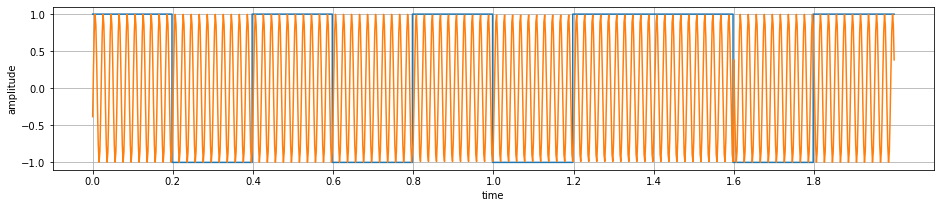

In [102]:
s_fm16 = to_fm16(val, t, h, f0)

fig14, ax14 = plt.subplots(figsize = (15.8, 3))
ax14.step(t[0:1001], s[0:1001])
ax14.plot(t[0:1001], s_fm16[0:1001])
print(val[:16])
ax14.set_xlabel('time')
ax14.set_ylabel('amplitude')
ax14.set_xticks(np.arange(0, 1.9, 10 / f0));
#ax14.set_xlim(0.7, 0.9)
ax14.grid()

In [115]:
def G_fm16(f, T, f0, U0 = 1):
    return 2 * U0**2 * T * (np.sinc(4 * (f - f0) * T))**2

In [109]:
nfft_fm16 = 1024
fteor_fm16 = np.linspace(-0.5*Fmax, 0.5*Fmax, nfft)

In [105]:
Rexp_fm16 = 1/len(s_fm16) * np.correlate(s_fm16, s_fm16, mode = 'full')
texp_fm16 = np.arange(-dt*(len(s_fm16)-1), dt * len(s_fm16), dt)

In [117]:
Gexp_fm16 = fft(Rexp_fm16, norm = 'forward')
Gexp_fm16 = 0.5 * (T/dt) * Gexp_fm16 
fexp_fm16 = np.linspace(-0.5*Fmax , 0.5*Fmax, len(Rexp_fm16)) # /np.pi
Gexp_fm16 = np.abs(fftshift(Gexp_fm16)) 

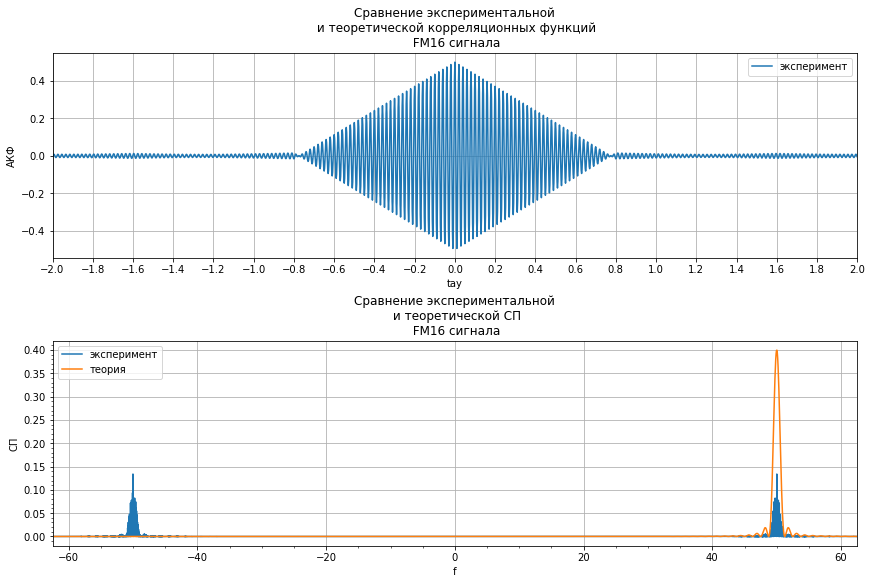

In [118]:
fig15, ax15 = plt.subplots(2, 1, figsize = (12, 8), constrained_layout=True)

ax15[0].plot(texp_fm16, Rexp_fm16, label = 'эксперимент')
ax15[0].set_xlabel('tay')
ax15[0].set_ylabel('АКФ')
ax15[0].set_title('Сравнение экспериментальной\n и теоретической корреляционных функций\n FM16 сигнала')
ax15[0].set_xlim(-10*T, 10*T)
ax15[0].set_xticks(np.arange(-2, 2.2, 0.2));
ax15[0].legend()
ax15[0].grid()

ax15[1].plot(fexp_fm16, Gexp_fm16, label = 'эксперимент')
ax15[1].plot(fteor_fm16, G_fm16(fteor_fm16, T, f0), label = 'теория')
ax15[1].set_xlabel('f')
ax15[1].set_ylabel('СП')
ax15[1].set_title('Сравнение экспериментальной\n и теоретической СП\n FM16 сигнала')
ax15[1].set_xlim(-0.5*Fmax/4, 0.5*Fmax/4)
ax15[1].legend()
ax15[1].minorticks_on()
ax15[1].grid()

# АФМ 8 

In [610]:
def groupingBits3(val):
    
    first = []
    second = []
    third = []
    
    try:
        for i in range(0,len(val),3):
            first.append(val[i])
            second.append(val[i+1])
            third.append(val[i+2])

    except IndexError:
        print("IndexError")
        
    return first, second, third

In [611]:
def to_afm8(val, t, h, f0, U0 = 1.0, nperiods = 10):
    nperiods_new = nperiods * 3
    ph0 = 0
    first, second, third = groupingBits3(val)
    
    first.append(1)
    second.append(1)
    third.append(1)
    
    (first_samples, t0, T_afm8) = to_samples(first, f0, nperiods = nperiods_new)
    (second_samples, t0, T_afm8) = to_samples(second, f0, nperiods = nperiods_new)
    (third_samples, t0, T_afm8) = to_samples(third, f0, nperiods = nperiods_new)
    
    subOne = funcQPSK(t, first_samples[:len(t)], second_samples[:len(t)], h, f0, 0)
    subTwo = ((1 + np.sqrt(3)) / np.sqrt(2)) * funcQPSK(t, first_samples[:len(t)], second_samples[:len(t)], h, f0, np.pi/4)
    
    one = (np.array(third_samples[:len(t)]) + 1) / 2  * subOne
    two = (np.array(third_samples[:len(t)]) - 1) / 2  * subTwo
    
    res = one - two
    
    return  res

IndexError
Число отсчётов, приходящихся на один символ:  300
Число отсчётов, приходящихся на один символ:  300
Число отсчётов, приходящихся на один символ:  300
[-1  1 -1 -1 -1 -1  1 -1  1  1]


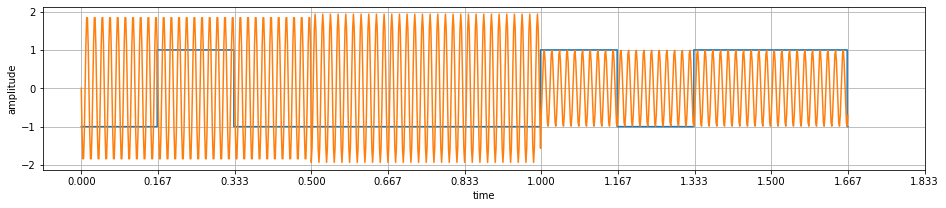

In [634]:
s_afm8 = to_afm8(val, t, h, f0)

fig16, ax16 = plt.subplots(figsize = (15.8, 3))
ax16.step(t[:1001], s[:1001])
ax16.plot(t[:1001], s_afm8[:1001])
print(val[:10])
ax16.set_xlabel('time')
ax16.set_ylabel('amplitude')
ax16.set_xticks(np.arange(0, 1.9, 10 / f0));
#ax7.set_xlim(1.0, 1.4)
ax16.grid()

In [613]:
Rexp_afm8 = 1/len(s_afm8) * np.correlate(s_afm8, s_afm8, mode = 'full')
texp_afm8 = np.arange(-dt*(len(s_afm8)-1), dt * len(s_afm8), dt)

In [614]:
Gexp_afm8 = fft(Rexp_afm8, norm = 'forward')
Gexp_afm8 = 0.5 * (T/dt) * Gexp_afm8 
fexp_afm8 = np.linspace(-0.5*Fmax , 0.5*Fmax, len(Rexp_afm8)) # /np.pi
Gexp_afm8 = np.abs(fftshift(Gexp_afm8)) 

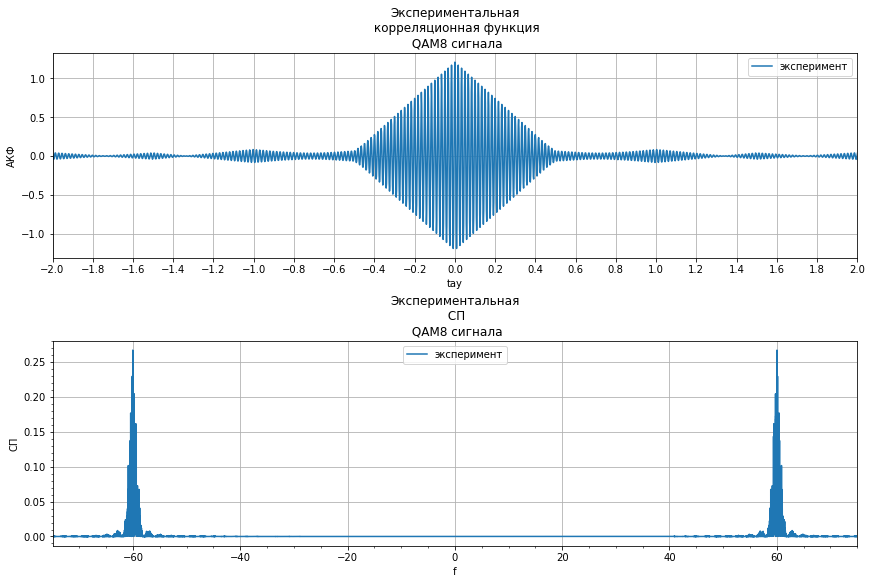

In [615]:
fig17, ax17 = plt.subplots(2, 1, figsize = (12, 8), constrained_layout=True)

ax17[0].plot(texp_afm8, Rexp_afm8, label = 'эксперимент')
ax17[0].set_xlabel('tay')
ax17[0].set_ylabel('АКФ')
ax17[0].set_title('Экспериментальная\n корреляционная функция\n QAM8 сигнала')
ax17[0].set_xlim(-10*T, 10*T)
ax17[0].set_xticks(np.arange(-2, 2.2, 0.2));
ax17[0].legend()
ax17[0].grid()

ax17[1].plot(fexp_afm8, Gexp_afm8, label = 'эксперимент')
ax17[1].set_xlabel('f')
ax17[1].set_ylabel('СП')
ax17[1].set_title('Экспериментальная\n СП\n QAM8 сигнала')
ax17[1].set_xlim(-0.5*Fmax/4, 0.5*Fmax/4)
ax17[1].legend()
ax17[1].minorticks_on()
ax17[1].grid()

# АФМ 16

In [577]:
def to_afm16(val, t, h, f0, U0 = 1.0, nperiods = 10):
    nperiods_new = nperiods * 4
    ph0 = 0
    first, second, third, fourth = groupingBits(val)
    
    (first_samples, t0, T_afm16) = to_samples(first, f0, nperiods = nperiods_new)
    (second_samples, t0, T_afm16) = to_samples(second, f0, nperiods = nperiods_new)
    (third_samples, t0, T_afm16) = to_samples(third, f0, nperiods = nperiods_new)
    (fourth_samples, t0, T_afm16) = to_samples(fourth, f0, nperiods = nperiods_new)
    
    one = funcQPSK(t, first_samples, second_samples, h, f0, 0)
    two = 2 * funcQPSK(t, third_samples, fourth_samples, h, f0, 0)
    
    res = (one + two)
    
    return  res

Число отсчётов, приходящихся на один символ:  400
Число отсчётов, приходящихся на один символ:  400
Число отсчётов, приходящихся на один символ:  400
Число отсчётов, приходящихся на один символ:  400
[ 1 -1 -1 -1  1  1  1 -1  1 -1]


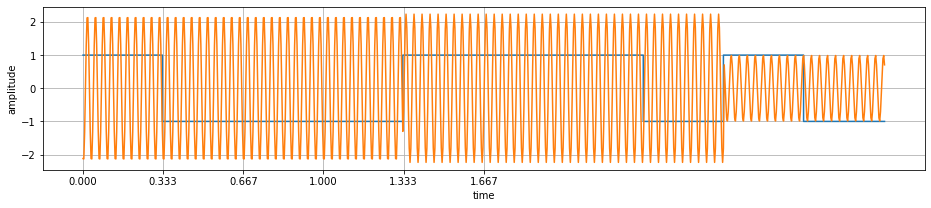

In [578]:
s_afm16 = to_afm16(val, t, h, f0)

fig18, ax18 = plt.subplots(figsize = (15.8, 3))
ax18.step(t[:1001], s[:1001])
ax18.plot(t[:1001], s_afm16[:1001])
print(val[:10])
ax18.set_xlabel('time')
ax18.set_ylabel('amplitude')
ax18.set_xticks(np.arange(0, 1.9, 10 / f0));
#ax7.set_xlim(1.0, 1.4)
ax18.grid()

In [579]:
Rexp_afm16 = 1/len(s_afm16) * np.correlate(s_afm16, s_afm16, mode = 'full')
texp_afm16 = np.arange(-dt*(len(s_afm16)-1), dt * len(s_afm16), dt)

In [580]:
Gexp_afm16 = fft(Rexp_afm16, norm = 'forward')
Gexp_afm16 = 0.5 * (T/dt) * Gexp_afm16 
fexp_afm16 = np.linspace(-0.5*Fmax , 0.5*Fmax, len(Rexp_afm16)) # /np.pi
Gexp_afm16 = np.abs(fftshift(Gexp_afm16)) 

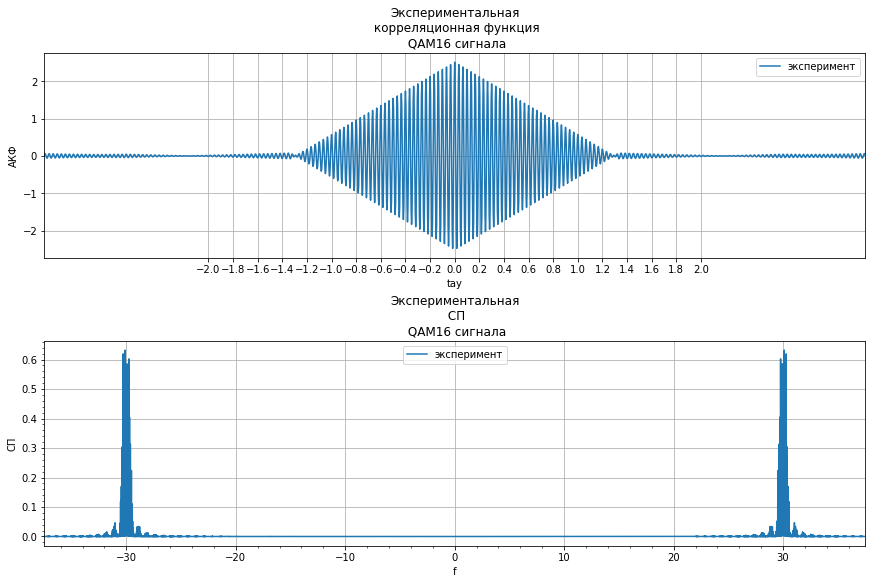

In [581]:
fig19, ax19 = plt.subplots(2, 1, figsize = (12, 8), constrained_layout=True)

ax19[0].plot(texp_afm16, Rexp_afm16, label = 'эксперимент')
ax19[0].set_xlabel('tay')
ax19[0].set_ylabel('АКФ')
ax19[0].set_title('Экспериментальная\n корреляционная функция\n QAM16 сигнала')
ax19[0].set_xlim(-10*T, 10*T)
ax19[0].set_xticks(np.arange(-2, 2.2, 0.2));
ax19[0].legend()
ax19[0].grid()

ax19[1].plot(fexp_afm16, Gexp_afm16, label = 'эксперимент')
ax19[1].set_xlabel('f')
ax19[1].set_ylabel('СП')
ax19[1].set_title('Экспериментальная\n СП\n QAM16 сигнала')
ax19[1].set_xlim(-0.5*Fmax/4, 0.5*Fmax/4)
ax19[1].legend()
ax19[1].minorticks_on()
ax19[1].grid()

# ЧМ со скачком фазы 

In [233]:
f1 = 0.5 * f0

In [234]:
def to_chm(val, t, h, f0, f1,  U0 = 1.0, nperiods = 10):
    ph0 = 0
    (chm_samples, t0, T_chm) = to_samples(val, f0)
    
    one = 1/2 * U0 * np.cos(2 * np.pi * f0 * t) * (1 + chm_samples / h)
    two = 1/2 * U0 * np.cos(2 * np.pi * f1 * t) * (1 - chm_samples / h)
    
    return  (one + two)

Число отсчётов, приходящихся на один символ:  100
[ 1 -1  1 -1  1 -1  1  1 -1  1]


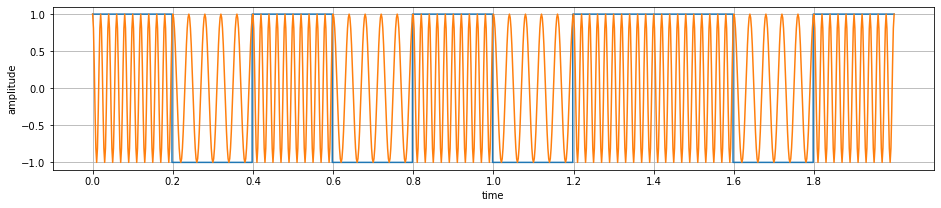

In [235]:
s_chm = to_chm(val, t, h, f0, f1)

fig20, ax20 = plt.subplots(figsize = (15.8, 3))
ax20.step(t[:1001], s[:1001])
ax20.plot(t[:1001], s_chm[:1001])
print(val[:10])
ax20.set_xlabel('time')
ax20.set_ylabel('amplitude')
ax20.set_xticks(np.arange(0, 1.9, 10 / f0));
#ax7.set_xlim(1.0, 1.4)
ax20.grid()

In [249]:
def deltaFunc(x, x0):
    res = []
    for i in x:
        if i == x0:
            res.append(1)
        else:
            res.append(0)
    return np.array(res)

In [244]:
def R_chm(tau, T, f0, f1, U0 = 1.0):
    one = U0**2 / 8 * (np.cos(2 * np.pi * f0 * tau) + np.cos(2 * np.pi * f1 * tau))
    two = U0**2 / 8 * (1-abs(tau)/T) * (np.cos(2 * np.pi * f0 * tau) + np.cos(2 * np.pi * f1 * tau))
    tselect = 1 * (np.abs(tau) <= T)
    two = tselect * two
    return one + two

def G_chm(f, T, f0, f1, U0 = 1.0):
    one = (np.pi * U0**2 / 4) * (deltaFunc(f, f0) + deltaFunc(f, f1)) 
    two = (T * U0**2 / 4) * ((np.sinc((f - f0) * T))**2 + (np.sinc((f - f1) * T))**2)
    return one + two

In [267]:
tteor_chm = np.arange(-1.5*T, 1.5*T, step = dt)
nfft_chm = 9024
fteor_chm = np.linspace(-0.5*Fmax, 0.5*Fmax, nfft)  #np.arange(-0.5*Fmax, 0.5*Fmax, 1/f0)

In [261]:
Rexp_chm = 1/len(s_chm) * np.correlate(s_chm, s_chm, mode = 'full')
texp_chm = np.arange(-dt*(len(s_chm)-1), dt * len(s_chm), dt)

In [272]:
Gexp_chm = fft(Rexp_chm, norm = 'forward')
Gexp_chm = 0.5 * (T/dt) * Gexp_chm 
fexp_chm = np.linspace(-0.5*Fmax , 0.5*Fmax, len(Rexp_chm)) # /np.pi
Gexp_chm = np.abs(fftshift(Gexp_chm)) 

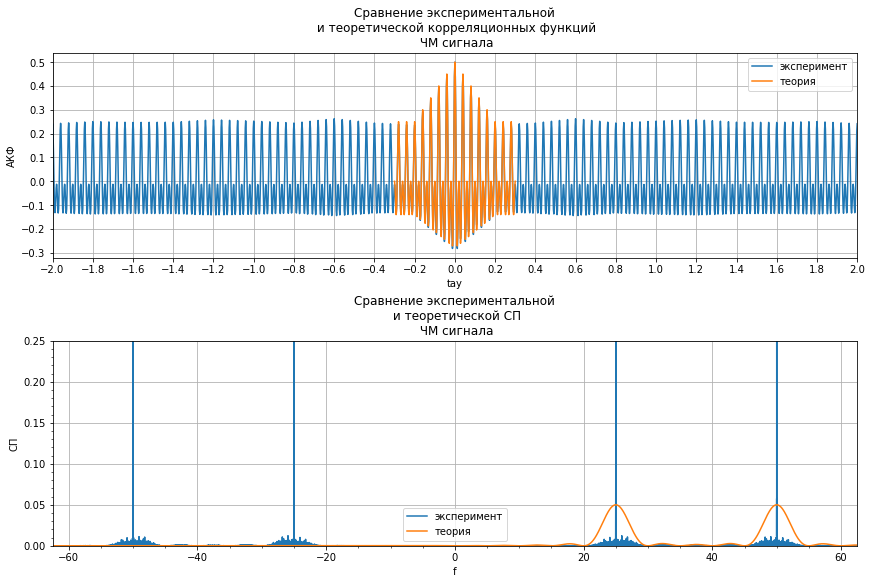

In [273]:
fig21, ax21 = plt.subplots(2, 1, figsize = (12, 8), constrained_layout=True)

ax21[0].plot(texp_chm, Rexp_chm, label = 'эксперимент')
ax21[0].plot(tteor_chm, R_chm(tteor_chm, T, f0, f1), label = 'теория')
ax21[0].set_xlabel('tay')
ax21[0].set_ylabel('АКФ')
ax21[0].set_title('Сравнение экспериментальной\n и теоретической корреляционных функций\n ЧМ сигнала')
ax21[0].set_xlim(-10*T, 10*T)
ax21[0].set_xticks(np.arange(-2, 2.2, 0.2));
ax21[0].legend()
ax21[0].grid()

ax21[1].plot(fexp_chm, Gexp_chm, label = 'эксперимент')
ax21[1].plot(fteor_chm, G_chm(fteor_chm, T, f0, f1), label = 'теория')
ax21[1].set_xlabel('f')
ax21[1].set_ylabel('СП')
ax21[1].set_title('Сравнение экспериментальной\n и теоретической СП\n ЧМ сигнала')
ax21[1].set_xlim(-0.5*Fmax/4, 0.5*Fmax/4)
ax21[1].set_ylim(0, 0.25)
ax21[1].legend()
ax21[1].minorticks_on()
ax21[1].grid()

# Модуляция с минимальным сдвигом (ММС)

In [423]:
def to_chm_offset(val, t, h, f0, f1,  U0 = 1.0, nperiods = 10):
    ph0 = 0
    n = [1]
    repeat = 1
    for i in range(1, len(val)):
        if val[i] != val[i-1]:
            if val[i-1] == 1:
                if repeat % 2 != 0:
                    n.append(-1 * n[i-1])
                else:
                    n.append(n[i-1])
            else:
                if repeat % 2 != 0:
                    n.append(n[i-1])
                else:
                    n.append(-1 * n[i-1])
        else:
            n.append(n[i-1])
            repeat += 1
    #n[8] = -1
    print(n[:10])
    
    (n_samples, t0, T_chm) = to_samples(n, f0)
    (chm_samples, t0, T_chm) = to_samples(val, f0)
    res = np.sin(2 * np.pi * f0 * t + n_samples * np.pi / 2 + (chm_samples / h) * (np.pi * t) / (2*T)) #(chm_samples + 1)/2
    return res

[1, -1, -1, 1, 1, -1, -1, -1, -1, 1]
Число отсчётов, приходящихся на один символ:  100
Число отсчётов, приходящихся на один символ:  100
[ 1 -1  1 -1  1 -1  1  1 -1  1]


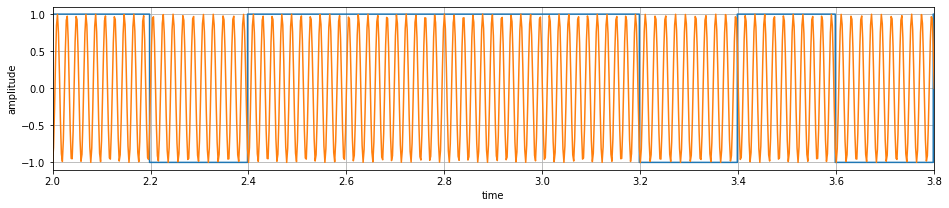

In [435]:
s_chm_offset = to_chm_offset(val, t, h, f0, f1)

fig22, ax22 = plt.subplots(figsize = (15.8, 3))
ax22.step(t[1000:2001], s[1000:2001])
ax22.plot(t[1000:2001], s_chm_offset[1000:2001])
print(val[:10])
ax22.set_xlabel('time')
ax22.set_ylabel('amplitude')
ax22.set_xticks(np.arange(2, 3.9, 10 / f0));  #0, 1.9, 10 / f0)
ax22.set_xlim(2, 3.8)
ax22.grid()

In [465]:
def G_chm_offset(f, T, f0, U0 = 1.0):
    one = (4 * T * U0**2) / (np.pi**2) 
    two = (1 + np.cos(4 * np.pi * (f - f0) * T)) / (1 - 16 * (f - f0)**2 * T**2)**2
    return one * two

In [447]:
nfft = 1024
fteor_chm_offset = np.linspace(-0.5*Fmax, 0.5*Fmax, nfft)  #np.arange(-0.5*Fmax, 0.5*Fmax, 1/f0)

In [438]:
Rexp_chm_offset = 1/len(s_chm_offset) * np.correlate(s_chm_offset, s_chm_offset, mode = 'full')
texp_chm_offset = np.arange(-dt*(len(s_chm_offset)-1), dt * len(s_chm_offset), dt)

In [468]:
Gexp_chm_offset = fft(Rexp_chm_offset, norm = 'forward')
Gexp_chm_offset = 0.5 * (T/dt) * Gexp_chm_offset 
fexp_chm_offset = np.linspace(-0.5*Fmax , 0.5*Fmax, len(Rexp_chm_offset)) # /np.pi
Gexp_chm_offset = np.abs(fftshift(Gexp_chm_offset)) 

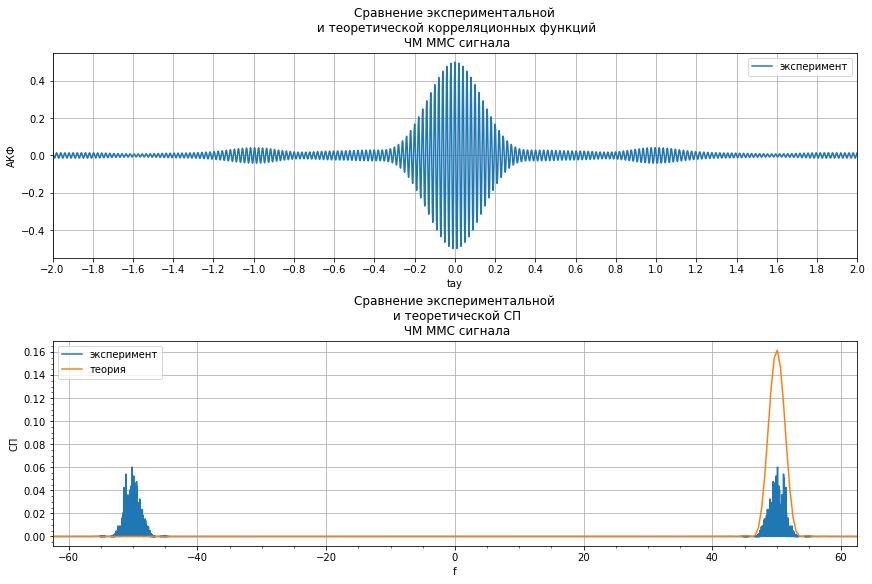

In [469]:
fig22, ax22 = plt.subplots(2, 1, figsize = (12, 8), constrained_layout=True)

ax22[0].plot(texp_chm_offset, Rexp_chm_offset, label = 'эксперимент')
ax22[0].set_xlabel('tay')
ax22[0].set_ylabel('АКФ')
ax22[0].set_title('Сравнение экспериментальной\n и теоретической корреляционных функций\n ЧМ ММС сигнала')
ax22[0].set_xticks(np.arange(-2, 2.2, 0.2));
ax22[0].set_xlim(-10*T, 10*T)
ax22[0].legend()
ax22[0].grid()

ax22[1].plot(fexp_chm_offset, Gexp_chm_offset, label = 'эксперимент')
ax22[1].plot(fteor_chm_offset, G_chm_offset(fteor_chm_offset, T, f0), label = 'теория')
ax22[1].set_xlabel('f')
ax22[1].set_ylabel('СП')
ax22[1].set_title('Сравнение экспериментальной\n и теоретической СП\n ЧМ ММС сигнала')
ax22[1].set_xlim(-0.5*Fmax/4, 0.5*Fmax/4)
#ax22[1].set_ylim(0, 0.5)
ax22[1].legend()
ax22[1].minorticks_on()
ax22[1].grid()